In [6]:
import numpy as np

from ase.build import fcc111
from ase.constraints import FixAtoms
from ase.ga.data import PrepareDB
from ase.ga.startgenerator import StartGenerator
from ase.ga.utilities import closest_distances_generator, get_all_atom_types

db_file = 'gadb.json'

# create the surface
slab = fcc111('Au', size=(4, 4, 1), vacuum=10.0, orthogonal=True)
slab.set_constraint(FixAtoms(mask=len(slab) * [True]))

# define the volume in which the adsorbed cluster is optimized
# the volume is defined by a corner position (p0)
# and three spanning vectors (v1, v2, v3)
pos = slab.get_positions()
cell = slab.get_cell()
p0 = np.array([0., 0., max(pos[:, 2]) + 2.])
v1 = cell[0, :] * 0.8
v2 = cell[1, :] * 0.8
v3 = cell[2, :]
v3[2] = 3.

# Define the composition of the atoms to optimize
atom_numbers = 2 * [47] + 2 * [79]

# define the closest distance two atoms of a given species can be to each other
unique_atom_types = get_all_atom_types(slab, atom_numbers)
blmin = closest_distances_generator(atom_numbers=unique_atom_types,
                                    ratio_of_covalent_radii=0.7)

# create the starting population
sg = StartGenerator(slab, atom_numbers, blmin,
                    box_to_place_in=[p0, [v1, v2, v3]])

# generate the starting population
population_size = 20
starting_population = [sg.get_new_candidate() for i in range(population_size)]

# from ase.visualize import view   # uncomment these lines
# view(starting_population)        # to see the starting population

# create the database to store information in
d = PrepareDB(db_file_name=db_file,
              simulation_cell=slab,
              stoichiometry=atom_numbers)

for a in starting_population:
    print(a)
    d.add_unrelaxed_candidate(a)

Atoms(symbols='Au16Ag2Au2', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))
Atoms(symbols='Au16Ag2Au2', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))
Atoms(symbols='Au16Ag2Au2', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))
Atoms(symbols='Au16Ag2Au2', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))
Atoms(symbols='Au16Ag2Au2', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))


In [2]:
from random import random

from ase.calculators.emt import EMT
from ase.ga.cutandsplicepairing import CutAndSplicePairing
from ase.ga.data import DataConnection
from ase.ga.offspring_creator import OperationSelector
from ase.ga.population import Population
from ase.ga.standard_comparators import InteratomicDistanceComparator
from ase.ga.standardmutations import (
    MirrorMutation,
    PermutationMutation,
    RattleMutation,
)
from ase.ga.utilities import closest_distances_generator, get_all_atom_types
from ase.io import write
from ase.optimize import BFGS

# Change the following three parameters to suit your needs
population_size = 20
mutation_probability = 0.3
n_to_test = 20

# Initialize the different components of the GA
da = DataConnection('gadb.db')
atom_numbers_to_optimize = da.get_atom_numbers_to_optimize()
n_to_optimize = len(atom_numbers_to_optimize)
slab = da.get_slab()

In [3]:
slab

Atoms(symbols='Au16', pbc=[True, True, False], cell=[11.539982668964457, 9.993918150555366, 20.0], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]))

In [31]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.structure import Structure

In [33]:
structure = Structure.from_ase_atoms(atoms)
xrd = XRDCalculator(wavelength=0.3681)

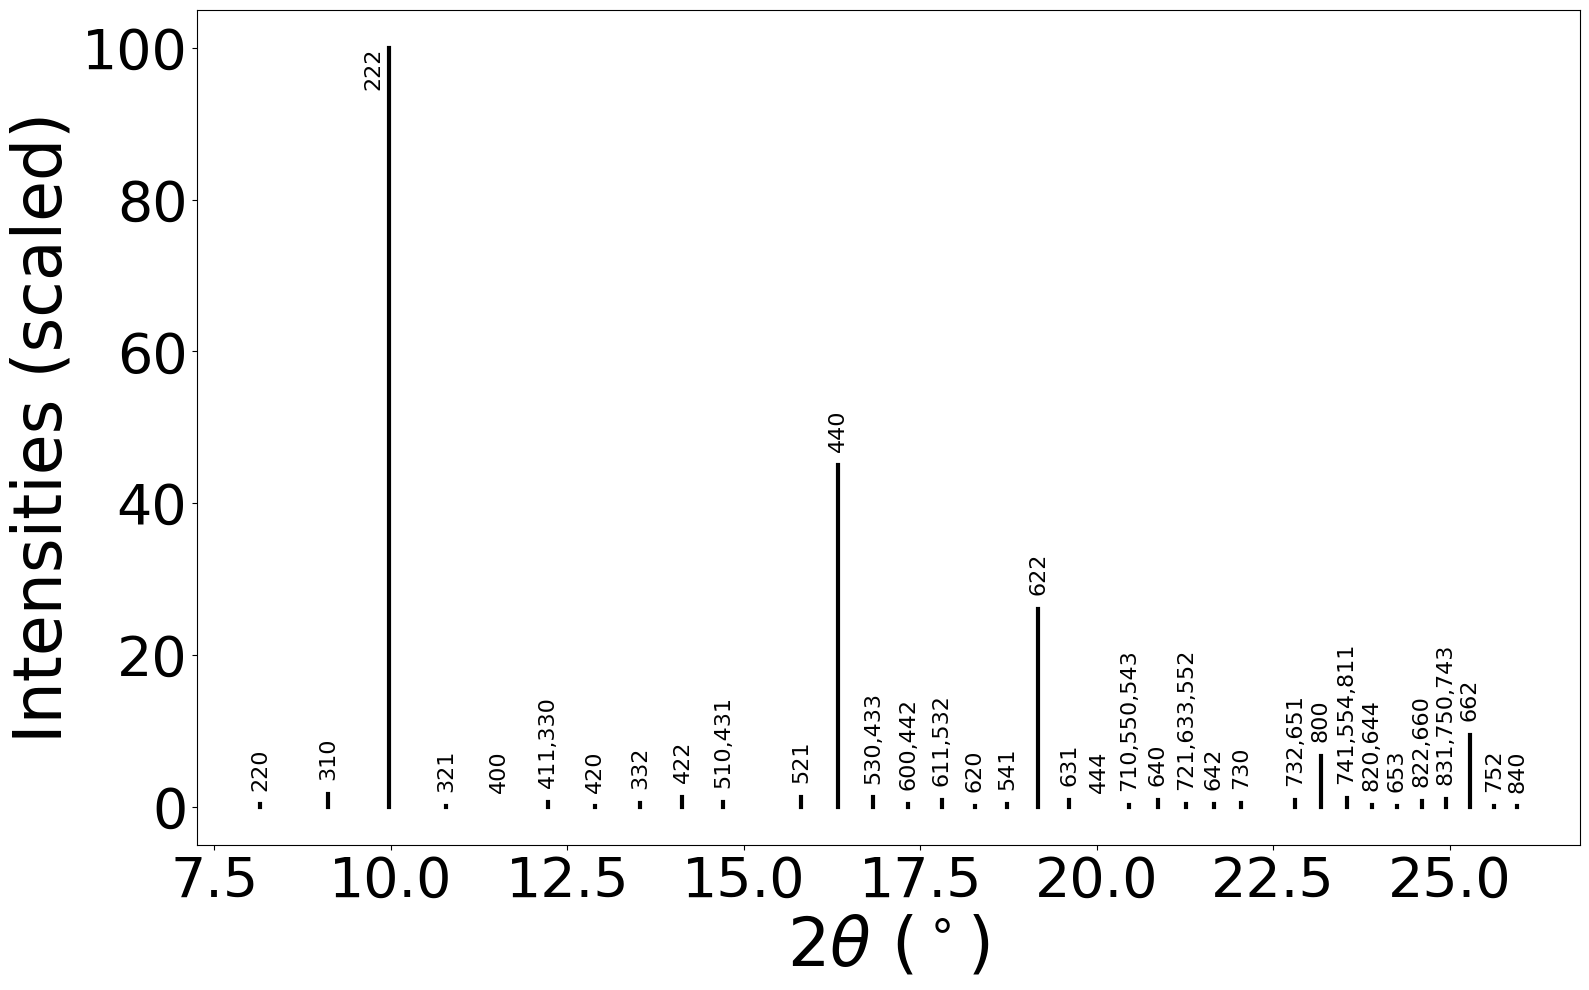

In [35]:
xrd.show_plot(structure, two_theta_range=(8, 26))

In [3]:
import plotly.graph_objects as go
# 示例数据
x = ['A', 'B', 'C']
y = [10, 20, 15]
# 创建柱状图
fig = go.Figure(data = [go.Bar(x = x, y = y, width = 0.01)])
# 显示图形
fig.show()

In [40]:
dp.y

array([3.11855391e-01, 1.73691711e+00, 1.00000000e+02, 6.65413828e-02,
       8.25378419e-03, 6.77387399e-01, 4.69177944e-02, 5.07266947e-01,
       1.31982532e+00, 6.26532858e-01, 1.28474611e+00, 4.49844843e+01,
       1.23540513e+00, 4.22159989e-01, 8.42927342e-01, 5.39106575e-02,
       3.15256522e-01, 2.60822421e+01, 8.60078164e-01, 1.80016450e-02,
       1.87642882e-01, 8.99240086e-01, 3.63677690e-01, 3.75389529e-01,
       4.77723066e-01, 8.63031979e-01, 6.65278581e+00, 1.16675124e+00,
       2.37325368e-01, 1.15647901e-01, 7.23333435e-01, 1.06074170e+00,
       9.41729829e+00, 1.19120454e-01, 4.21462498e-02])